# Component 3
----
## A Function of A Data Receiving System

In [24]:
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib as mat
import matplotlib.pyplot as plt
import seaborn as sns
import random
from random import randrange
import cartopy.crs as ccrs
import cartopy
import re
import time
from datetime import datetime
import ipywidgets

from bokeh.io import output_notebook, show, gridplot
from bokeh.plotting import figure
import bokeh.models
from bokeh.models import PrintfTickFormatter
from bokeh.plotting import figure
from bokeh.resources import CDN
from bokeh.embed import file_html

import matplotlib.cm as cm
from mpl_toolkits.mplot3d import Axes3D

## Read in Sample Data and Test Run

In [25]:
dt = pd.read_csv("sample_flat.csv")

In [26]:
def how_many(data, find_quant = True, return_n = False):
        varlist = data.keys().tolist()
        if find_quant:
            match = 'quant'
        else:
            match = 'cat'
        rx = re.compile(r'^{}'.format(match))
        var_match = [var for var in varlist if re.match(rx, var)]
        if return_n:
            result = len(var_match)
        else:
            result = var_match
        return result
    
# report how many categorical variables:
n_cat = how_many(data = dt, find_quant = False, return_n = True)
cats = how_many(data= dt, find_quant = False)

# report how many quantitative variables:
n_quan = how_many(data = dt, return_n = True)
quans = how_many(data = dt)

In [27]:
print('--- Randomly select a quant variable: \n')
idx = randrange(0,n_quan)
quan_selected = quans[idx]
print('Variable name: {}\n\nFirst 3 obs:'.format(quan_selected))
print(dt[quan_selected][:3])

print('\n--- Randomly select a categorical variable: \n')
idx = randrange(0,n_cat)
cat_selected = cats[idx]
print('Variable name: {}\n\nFirst 3 obs:'.format(cat_selected))
print(dt[cat_selected][:3])

--- Randomly select a quant variable: 

Variable name: quant2

First 3 obs:
0     6.052785
1   -11.065076
2    11.437340
Name: quant2, dtype: float64

--- Randomly select a categorical variable: 

Variable name: categorical

First 3 obs:
0    Category01
1    Category00
2    Category04
Name: categorical, dtype: object


In [33]:
def getYear(inp):
    temp = datetime.fromtimestamp(inp).strftime('%Y')
    return temp

dt['Year'] = dt.dates.apply(getYear)

## Visualizing A Relationship between (quant, quant) and (lon, lat) 
---
### Using Bokeh

In [28]:
output_notebook()

Loading BokehJS ...

In [29]:
def var1var2_lonlat(data = dt, quan_list = quans, cat_list = cats, use_dates = False):

    # Randomly select 2 variables as x and y in the first plot

    quan_select = random.sample(quan_list, 2)
    var1 = quan_select[0]
    var2 = quan_select[1]
    
    if use_dates:
        var2 = 'Year'
        
    # define source data for bokeh
    data_select = data.copy()[['latitude','longitude',var1,var2]]
    source = bokeh.models.ColumnDataSource(data_select)
    
    # figure setting
    TOOLS = 'box_select,lasso_select,help,reset,box_zoom'

    p1 = figure(tools = TOOLS, 
                title = "{0} by {1}".format(var1,var2),
                width=600, height = 600, 
                x_axis_label = var2 , y_axis_label = var1)

    p1.yaxis[0].formatter = PrintfTickFormatter(format="%5.2f")
                
    p2 = figure(tools = TOOLS, 
                title = "Locations",
                width=600, height = 600,
                x_axis_label = 'longitude', y_axis_label = "latitude")

    p2.xaxis[0].formatter = PrintfTickFormatter(format="%5.2f")
    p2.yaxis[0].formatter = PrintfTickFormatter(format="%5.2f")
    
    # draw figures
    p1.circle(var2,var1, source = source,
                 size = 2,
                 selection_color="firebrick",
                 nonselection_fill_alpha=0.05,
                 nonselection_fill_color="blue")
    p2.circle('longitude','latitude', source = source,
                 size = 2,
                 selection_color="firebrick",
                 nonselection_fill_alpha=0.05,
                 nonselection_fill_color="blue")
    
    p = gridplot([[p1, p2]])
    show(p)
    
    # also output as a html file
    html = file_html(p, CDN, "Linked Viewing: {0} by {1} and Locations".format(var1,var2))
    html_file= open("Bokeh_LinkedViewing.html","w")
    html_file.write(html)
    html_file.close()

In [30]:
var1var2_lonlat()

In [31]:
var1var2_lonlat(use_dates = True)

KeyError: "['Year'] not in index"

## Visualizing A Relationship between categorical and quant
---

In [13]:
cat = dt["categorical"].tolist()
cat_set = set(cat)
cat_list = list(cat_set)
cat_list.sort()
cat_list

['Category00',
 'Category01',
 'Category02',
 'Category03',
 'Category04',
 'Category05',
 'Category06',
 'Category07',
 'Category08',
 'Category09']

In [14]:
n = len(cat_list)
q = []
for i in range(n):
    q.append(cat.count(cat_list[i]))
q

[954, 972, 1024, 1033, 1077, 1038, 998, 1016, 955, 933]

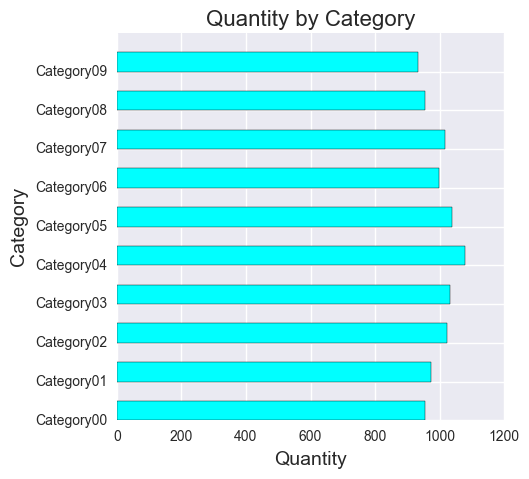

In [15]:
ind = range(n)
plt.figure(figsize=(5, 5))
height = 0.5
p1=plt.barh(ind,q,height, color="cyan")
plt.yticks(ind,cat_list,rotation='horizontal')
plt.xlabel('Quantity', fontsize = 14)
plt.ylabel('Category', fontsize = 14)
plt.title('Quantity by Category', fontsize = 16)
plt.show()

In [16]:
def qua_by_cat(data = dt):
    cat = dt["categorical"].tolist()
    cat_set = set(cat)
    cat_list = list(cat_set)
    cat_list.sort()
    n = len(cat_list)
    q = []
    for i in range(n):
        q.append(cat.count(cat_list[i]))
    ind = range(n)
    plt.figure(figsize=(5, 5))
    height = 0.5
    p1=plt.barh(ind,q,height, color="cyan")
    plt.yticks(ind,cat_list,rotation='horizontal')
    plt.xlabel('Quantity', fontsize = 14)
    plt.ylabel('Category', fontsize = 14)
    plt.title('Quantity by Category', fontsize = 16)
    plt.show()

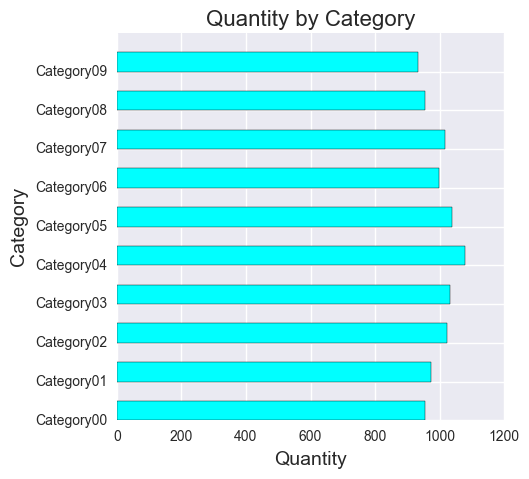

In [17]:
qua_by_cat()

In [ ]:
a = dt["quant1"].tolist()
b = dt["quant2"].tolist()
c = dt["quant3"].tolist()
d = dt["categorical"].tolist()

In [ ]:
colors = cm.rainbow(np.linspace(0, 1, len(cat_list)))
use_colors = {}
i = 0
for category in cat_list:
    use_colors[category] = colors[i]
    i+=1
use_colors

In [ ]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax = Axes3D(fig)
ax.scatter(a,b,c,color=[use_colors[x] for x in d])
xLabel = ax.set_xlabel('Quant1', linespacing=3.2)
yLabel = ax.set_ylabel('Quant2', linespacing=3.1)
zLabel = ax.set_zlabel('Quant3', linespacing=3.4)
plt.title('Quant1 Quan2 Quant3 by Category', fontsize = 14)
plt.show()

In [ ]:
def q1q2q3_with_catColor(data = dt):
    cat = dt["categorical"].tolist()
    cat_set = set(cat)
    cat_list = list(cat_set)
    a = dt["quant1"].tolist()
    b = dt["quant2"].tolist()
    c = dt["quant3"].tolist()
    colors = cm.rainbow(np.linspace(0, 1, len(cat_list)))
    use_colors = {}
    i = 0
    for category in cat_list:
        use_colors[category] = colors[i]
        i+=1
    fig = plt.figure()
    ax = fig.add_subplot(111)
    ax = Axes3D(fig)
    ax.scatter(a,b,c,color=[use_colors[x] for x in cat])
    xLabel = ax.set_xlabel('Quant1', linespacing=3.2)
    yLabel = ax.set_ylabel('Quant2', linespacing=3.1)
    zLabel = ax.set_zlabel('Quant3', linespacing=3.4)
    plt.title('Quant1 Quan2 Quant3 by Category', fontsize = 14)
    plt.show()

In [ ]:
q1q2q3_with_catColor()

## Visualizing Spatial Information

In [9]:
def mapplot (data = dt):
    fig, ax = plt.subplots(figsize = (20,20))
    ax = plt.axes(projection = ccrs.PlateCarree())
    ax.coastlines()
    #ax.stock_img()
    ax.scatter(dt["longitude"],dt["latitude"],c="#f7cac9")
    ax.set_title('Spatial Distribution', fontsize = 22)

    #ax.gridlines()

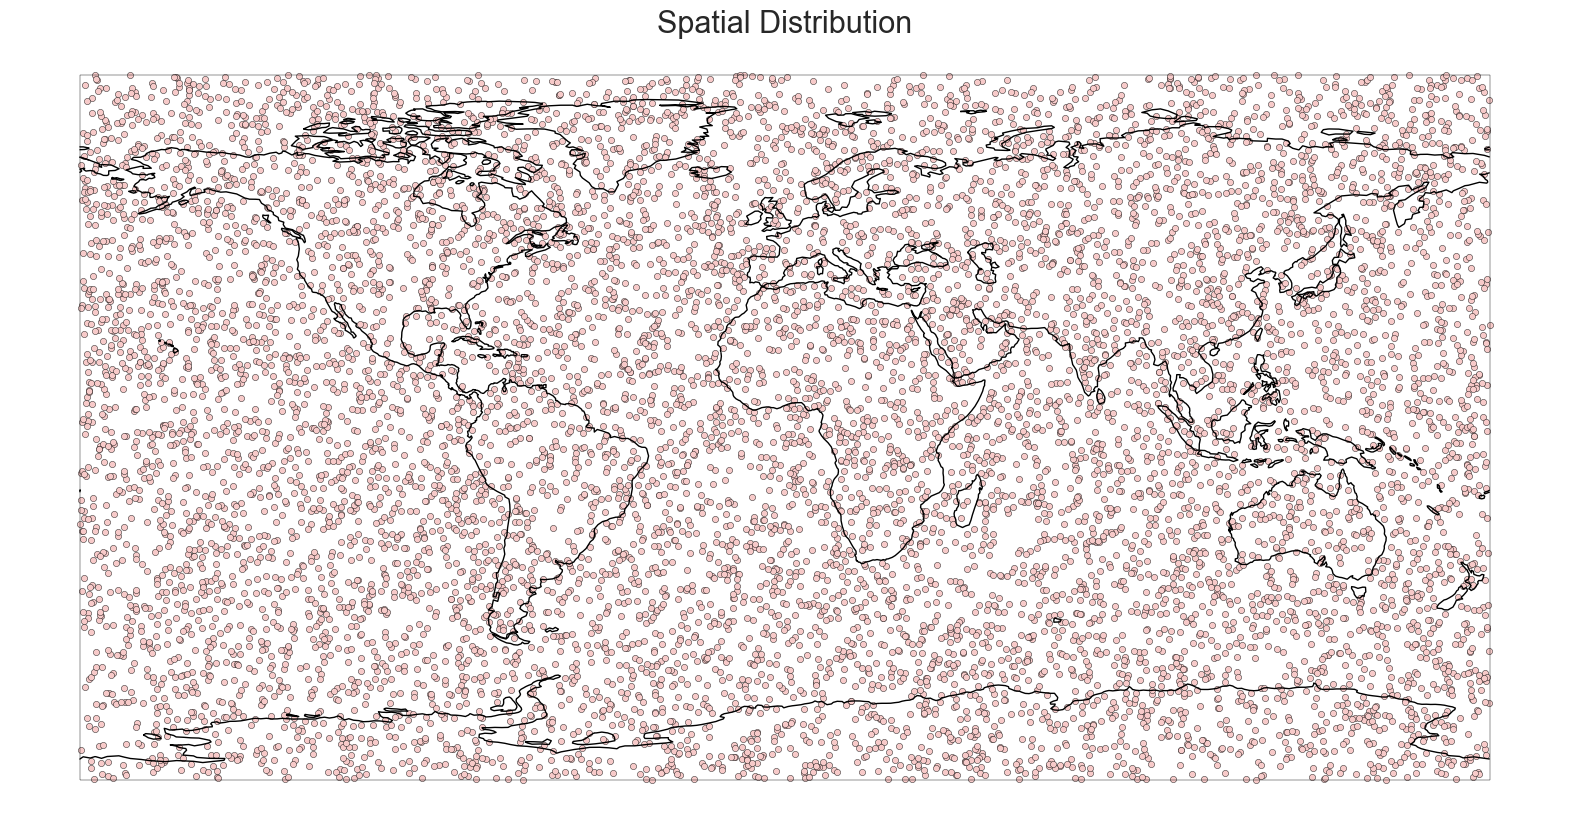

In [10]:
mapplot(dt)

In [ ]:
def map_cat_interactive(catcolumn, value,quantsize,quantcolor):
    good = (dt[catcolumn] == value)
    data_filtered = dt[good]
    min_val, max_val = dt[quantsize].min(), dt[quantsize].max()
    dt["newquant"] = ((dt[quantsize]-min_val)/(max_val-min_val))*100
    
    fig, ax = plt.subplots(figsize = (20,20))
    ax = plt.axes(projection = ccrs.PlateCarree())
    ax.coastlines()
    artist=ax.scatter(data_filtered["longitude"],data_filtered["latitude"],c=(data_filtered[quantcolor]),s=(dt.newquant))
    ax.set_title('Category: {0}'.format(value), fontsize = 22)
    # Create the inset axes and use it for the colorbar.
    cax = fig.add_axes([0.9, 0.4, 0.05, 0.3])
    cbar = fig.colorbar(artist, cax=cax)
    

In [ ]:
ipywidgets.interact(map_cat_interactive, catcolumn = 'categorical',
                   value = dt['categorical'].unique().tolist(),quantsize="quant2",quantcolor="quant1")

In [ ]:
def groupmap(data=dt,column="categorical"):
    groups=dt.groupby(column)
    fig, ax = plt.subplots(figsize = (20,20))
    ax = plt.axes(projection = ccrs.PlateCarree())
    ax.coastlines()
    for name, group in groups:
        ax.plot(group.longitude, group.latitude, marker='.', linestyle='', ms=12, label=name,alpha=0.3)
    ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.025),
              fancybox=True, shadow=True, ncol=5)
    ax.set_title('Map by categorical data', fontsize = 22)
    plt.show()

In [ ]:
groupmap(dt,"categorical")

In [34]:
yearmin=dt["Year"].min()
yearmax=dt["Year"].max()
def mapbyyear(column="Year",value="2016"):
    good = (dt[column] == value)
    data_filtered = dt[good]
    fig, ax = plt.subplots(figsize = (20,20))
    ax = plt.axes(projection = ccrs.PlateCarree())
    ax.coastlines()
    ax.plot(data_filtered["longitude"],data_filtered["latitude"], '.c')
    ax.set_title('Year: {0}'.format(value), fontsize = 22)

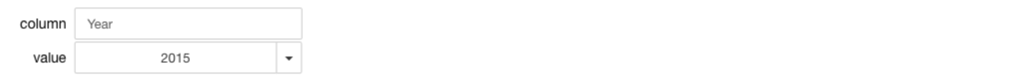

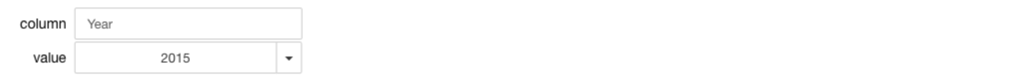

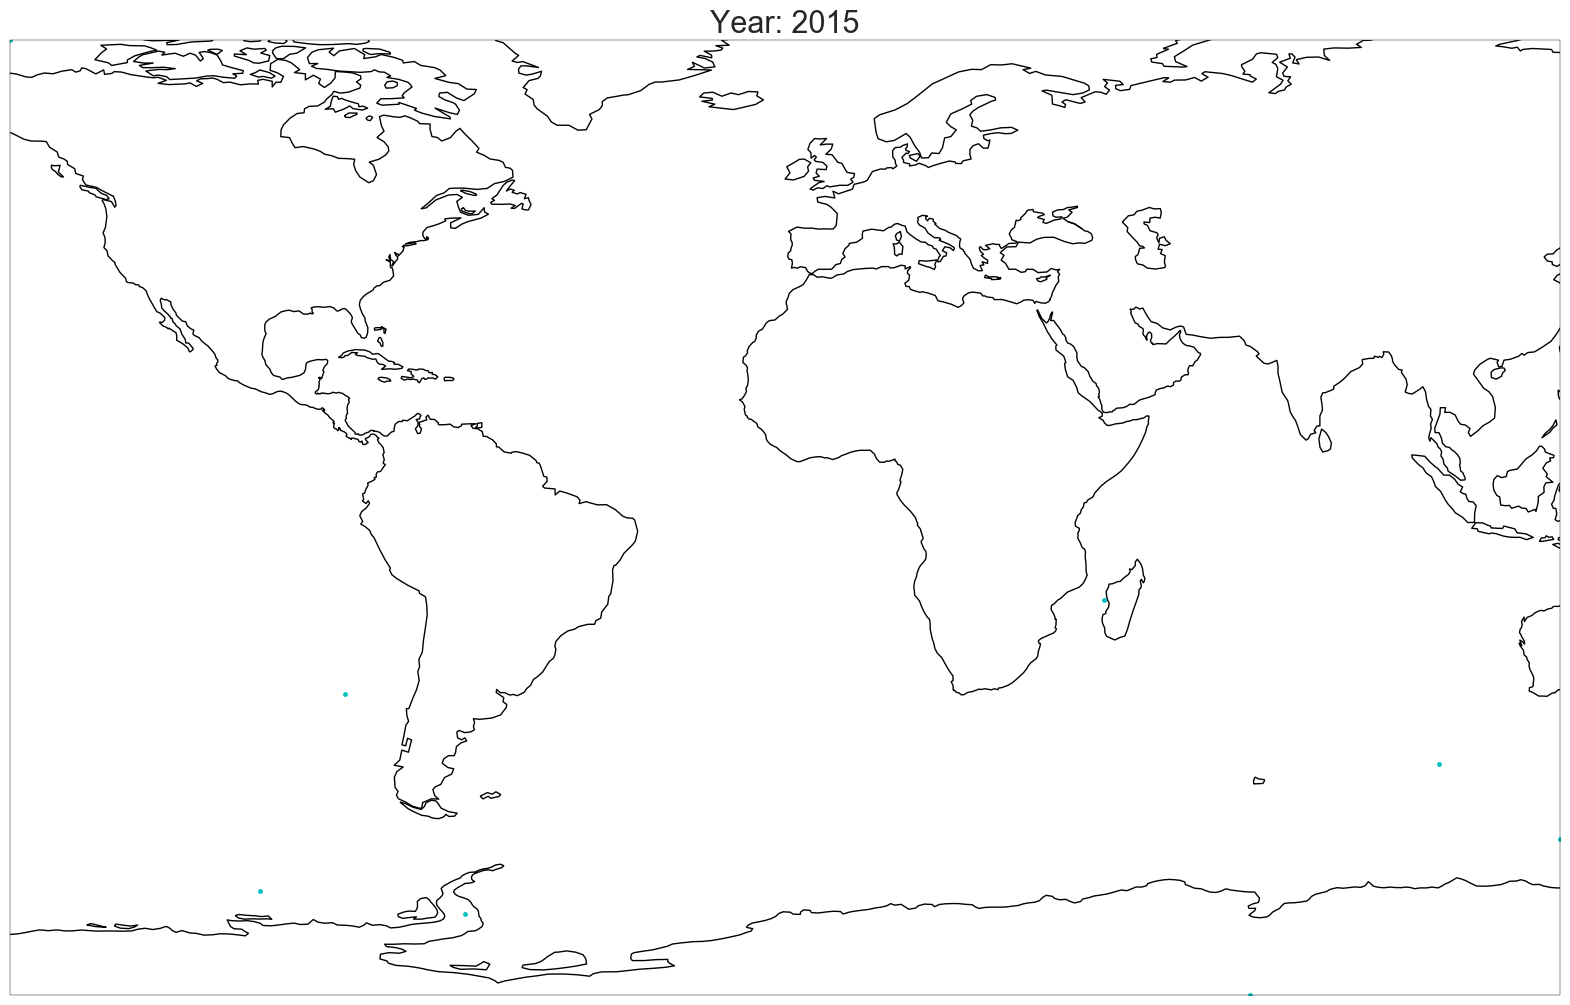

In [35]:
ipywidgets.interact(mapbyyear, column="Year",
                    value=(yearmin,yearmax))

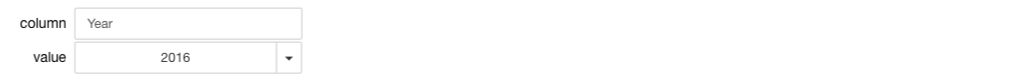

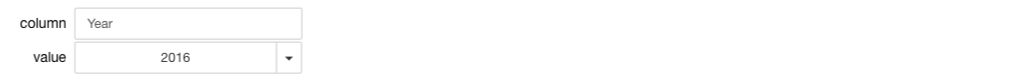

<function __main__.mapbyyear>

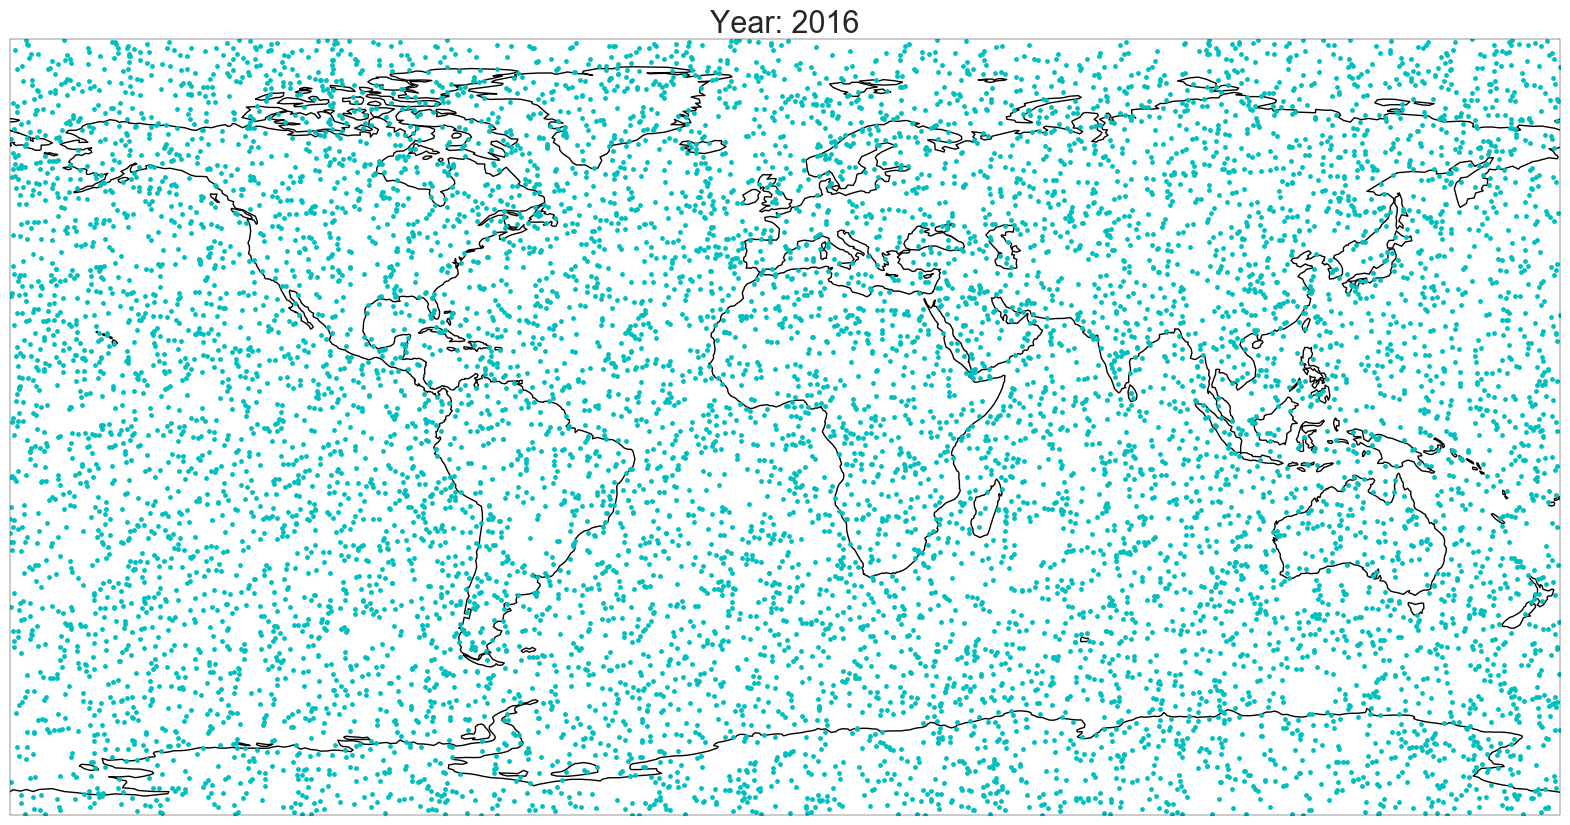

In [40]:
ipywidgets.interact(mapbyyear, column="Year",
                    value=(yearmin,yearmax))

In [42]:
#ipywidgets.HTML(mapbyyear)